In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

def plot_slope_log_log(slope, intercept, xlocation_frac=0.5):
    # based on https://stackoverflow.com/questions/71127745/how-to-annotate-a-regression-line-with-the-proper-text-rotation
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    xtext = np.exp2((np.log2(xmin) + np.log2(xmax)) * xlocation_frac)
    ytext = np.exp2(intercept + slope * np.log2(xtext))
    dx = np.log2(xtext)
    dy = np.log2(ytext) - intercept
    xfig, yfig = plt.gcf().get_size_inches()
    xnorm = dx * xfig / (np.log2(xmax) - np.log2(xmin))
    ynorm = dy * yfig / (np.log2(ymax) - np.log2(ymin))
    rotation = np.rad2deg(np.arctan2(ynorm, xnorm))
    plt.annotate(
        f'$slope={slope:.1f}$',
        (xtext, ytext), 
        xycoords='data', ha='center', va='bottom',
        rotation=rotation, rotation_mode='anchor')

def exe_type_plotter(ptype, x, y, err):
        if ptype =='bosons':
            marker_c = 'C0'
            line_c = 'C1'
            marker = "o"
            label = "bosons"
        elif ptype == 'distinguishable-bab':
            marker_c = 'C2'
            line_c = 'C3'
            marker = "s"
            label = "distinguishable"
        else:
            assert False, "Unknown plotter configuration for %s" % str(group_id)

        ar = plt.errorbar(x, y, err, linestyle='None', marker=marker, color='None', markeredgecolor=marker_c, markeredgewidth=3, markersize=9)
        ar.set_label(label)

        log_x_values_for_regress = np.log2(x)
        log_y_values_for_regress = np.log2(y)
        slope, intercept, r, p, std_err = stats.linregress(log_x_values_for_regress, log_y_values_for_regress)

        x_for_regress = np.exp2(log_x_values_for_regress)
        y_for_regress = np.exp2(intercept + slope * np.log2(x_for_regress))

        plt.plot(x_for_regress, y_for_regress, '-', color=line_c, linewidth=2)
        plot_slope_log_log(slope, intercept, xlocation_frac=0.5)

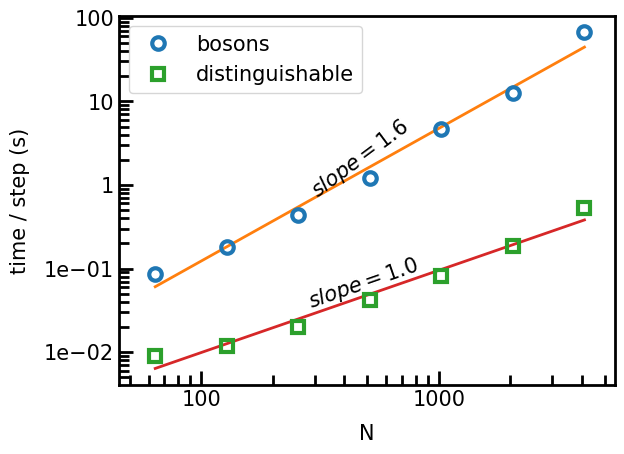

In [2]:
plt.rcParams['font.size'] = 15
plt.rc('axes',linewidth=2,labelpad=10)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rc('xtick.major',size=10, width=2)
plt.rc('xtick.minor',size=7, width=2)
plt.rc('ytick.major',size=10, width=2)
plt.rc('ytick.minor',size=7, width=2)

plt.xlabel('N')
plt.ylabel('time / step (s)')
plt.loglog()

x_formatter = matplotlib.ticker.LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 0.4))
plt.gca().xaxis.set_major_formatter(x_formatter)
plt.gca().xaxis.set_minor_formatter(x_formatter)
y_formatter = matplotlib.ticker.LogFormatter(labelOnlyBase=False, minor_thresholds=(2, 0.4))
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.gca().yaxis.set_minor_formatter(y_formatter)

plt.gca().set_xlim((45, 5500))

for ptype in ['bosons', 'distinguishable-bab']:
    x = np.loadtxt('data/%s_x.txt' % ptype)
    y = np.loadtxt('data/%s_y.txt' % ptype)
    err = np.loadtxt('data/%s_err.txt' % ptype)
    exe_type_plotter(ptype, x, y, err)

plt.legend()
plt.savefig('i_pi_boson_scalability.pdf', bbox_inches='tight')
plt.show()